# Modelo de Kermack McKendrick

hola

In [1]:
include("Taylor.jl")
using ADT

Las ecuaciones diferenciales que rigen el modelo para una especie son:

$$ \frac{dS}{dt} = -\beta SI$$
$$ \frac{dI}{dt} = \beta SI - \gamma I $$
$$ \frac{dR}{dt} = \gamma I $$
donde $S$ es el número de individuos suceptibles, $I$ el de individuos infectados y $R$ el de recuperados; así como $\beta$ es la tasa de transmisión de la infección y $\gamma$ la tasa de recuperación de la especie.

En este modelo NO tomamos en cuenta los nacimientos y muertes, así que para una población fija se tiene que $ N = S(t) + I(t) + R(t)$ en todo tiempo.

In [2]:
function coefs_1(gamma, beta, S0, I0, R0 = 0.0, n = 20)
    s = [S0]
    i = [I0]
    r = [R0]
    
    
    F1(S,I) = -beta*S*I
    F2(I) = gamma*I
    
    for k = 1:n-1
       
        
        Ts = Taylor(s)
        Ti = Taylor(i)
        Tr = Taylor(r)
        
        fs = F1(Ts,Ti) # F1 = -b*S*I
        fr = F2(Ti) # F2 = g*I
        
        fi = -fs -fr # = b*S*I - g*I
        
        S0 = fs.pol[k]/k
        I0 = fi.pol[k]/k
        R0 = fr.pol[k]/k
        
        push!(s,S0)
        push!(r,R0)
        push!(i,I0)
    end
    s = Taylor(s)
    i = Taylor(i)
    r = Taylor(r)
    return s,i,r
        
end

coefs_1 (generic function with 3 methods)

Prueba

In [3]:
N = 1000.;
I0 = 1.;
S0 = N-I0;

@time S,I,R = coefs_2(gamma, beta, S0, I0);

LoadError: LoadError: UndefVarError: coefs_2 not defined
while loading In[3], in expression starting on line 155

Error absoluto

In [240]:
eps_abs = 1e-20

1.0e-20

In [231]:
function paso(a::Taylor, p = 20)
    
    while p != 0 && a.pol[p] == 0
       p = p-1;
    end
    
    h = 0.5*(eps_abs/abs(a.pol[p]))^(1/p)
end

paso (generic function with 2 methods)

In [241]:
paso(S[1])

0.005885664739040877

In [199]:
function ev_horner{T<:Number}(a::Taylor,t0::T)
    
    n = gradomax(a)
    x1 = a.pol[n]
    
    for k = 1:n-1
        x1 = a.pol[n-k] + x1*t0
    end
    return x1
end

ev_horner (generic function with 1 method)

In [234]:
function integrador_kermack(N, I0, t0, tf, gamma, beta)
    R0 = 0.
    S0 = N - I0 - R0
    
    t = [t0]
    s = [S0]
    i = [I0]
    r = [R0]
    
    while t0 < tf
        
        S,I,R = coefs_1(gamma, beta, S0, I0)
        
        h_s = paso(S)
        h_i = paso(I)
        h_r = paso(R)
        h = min(h_s, h_i, h_r)
        
        t0 += h
        
        S0 = ev_horner(S,h)
        I0 = ev_horner(I,h)
        R0 = ev_horner(R,h)
        
        push!(t,t0)
        push!(s,S0)
        push!(i,I0)
        push!(r,R0)
    end
    return t,s,i,r
end

integrador_kermack (generic function with 1 method)

In [250]:
N = 1.
infectados_iniciales = N/1000
t_inicial = 0.
t_final = 160.
beta = 0.2
gamma = 0.1

@time t,s,i,r = integrador_kermack(N, infectados_iniciales, t_inicial, t_final, gamma, beta);

  0.067973 seconds (1.51 M allocations: 27.574 MB, 7.09% gc time)


In [252]:
length(s)

74

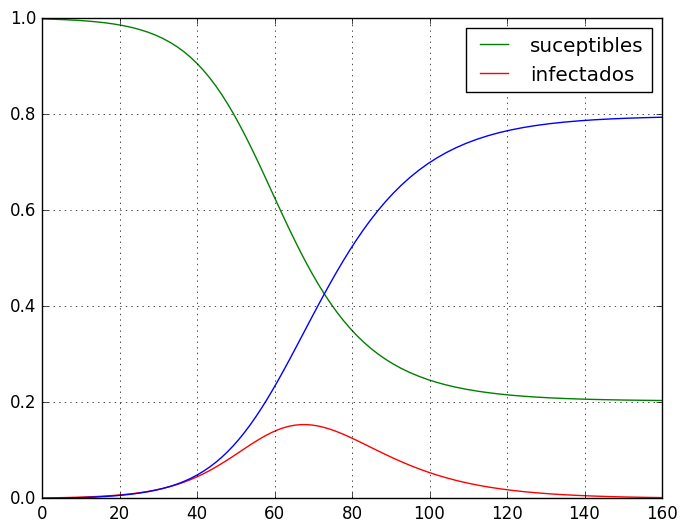

In [253]:
using PyPlot

plot(t,s, color = "green", label = "suceptibles")
plot(t,i, color = "red", label = "infectados")
plot(t,1-s-i)
axis([0,160,0,1])
grid()
legend()
show()

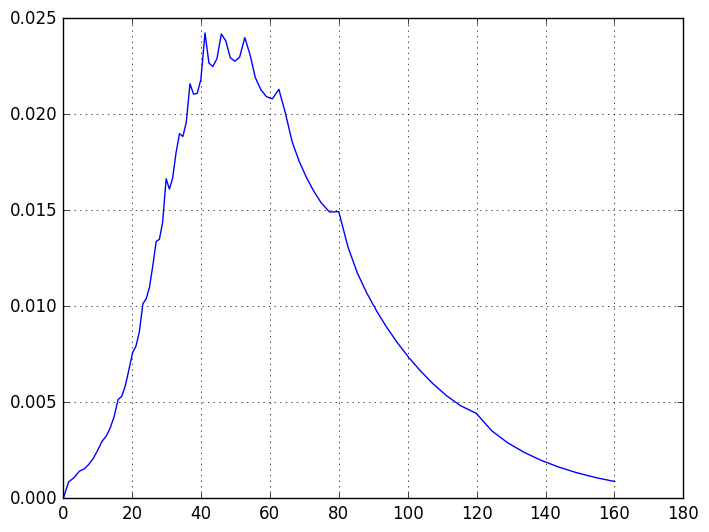

In [245]:
plot(t,r)
grid()

In [13]:
function wtf()
    return "WTF"
end

wtf (generic function with 1 method)

In [14]:
mi_reaccion_ante_la_grafica_de_r = wtf()

"WTF"

In [25]:
S,I,R = coefs_1(gamma, beta, S0, I0);
h = paso(R);

a = evaluar(R,h), ev_horner(R,h);

a[1] == a[2]

true

In [34]:
min(paso(R),paso(S))

5.471469367565628e-5

Para un sistema de $K$ especies, el modelo se vuelve

$$ \frac{dS_i}{dt} = -\sum_{j = 1}^K \beta_{ij} S_iI_j$$
$$ \frac{dI_i}{dt} = \sum_{j = 1}^K\beta_{ij} S_iI_j - \gamma_i I_i $$
$$ \frac{dR_i}{dt} = \gamma_i I_i $$
donde $S$ es el número de individuos suceptibles, $I$ el de individuos infectados y $R$ el de recuperados; así como $\beta$ es la tasa de transmisión de la infección y $\gamma$ la tasa de recuperación de la especie.


$$ \frac{dS_i}{dt} = -\beta_{i1} S_iI_1 - \beta_{i2} S_iI_2 - \beta_{i3} S_iI_3$$
$$ \frac{dI_i}{dt} = \beta_{i1} S_iI_1 + \beta_{i2} S_iI_2 + \beta_{i3} S_iI_3 - \gamma_i I_i $$
$$ \frac{dR_i}{dt} = \gamma_i I_i $$

In [129]:
function coefs_3(gamma, beta, S0_1, S0_2, S0_3, I0_1, I0_2, I0_3, R0 = 0.0, n = 20)
    S = Array{Array{Float64,1},1}();
    push!(S,[S0_1])
    push!(S,[S0_2])
    push!(S,[S0_3])
    I = Array{Array{Float64,1},1}();
    push!(I,[I0_1])
    push!(I,[I0_2])
    push!(I,[I0_3])

        
    F1(beta_ij,S,I) = -beta_ij*S*I
    F2(gamma_i,I) = gamma_i*I
    
    for k = 1:n-1
        Ts = [Taylor(S[j]) for j in 1:3]
        Ti = [Taylor(I[j]) for j in 1:3]
        
        for i = 1:3
            fs = 0
            fi = 0
            
            for j = 1:3
                fs += F1(beta[i,j],Ts[i],Ti[j])
            end
            
            fi = -fs - F2(gamma[i],Ti[i])
        
            S0 = fs.pol[k]/k
            I0 = fi.pol[k]/k

            push!(S[i], S0)
            push!(I[i], I0)
        end
    end
    s = [Taylor(S[i]) for i in 1:3]
    i = [Taylor(I[i]) for i in 1:3]
    
    return s,i
end

coefs_3 (generic function with 3 methods)

In [81]:
beta = rand(3,3)/3
gamma = rand(3)/8

3-element Array{Float64,1}:
 0.0115342
 0.0299025
 0.0602659

In [146]:
S0_1 = 99.
S0_2 = 90.
S0_3 = 93.
I0_1 = 1.
I0_2 = 3.
I0_3 = 2.

@time coefs_3(gamma, beta, S0_1, S0_2, S0_3, I0_1, I0_2, I0_3);

  0.010534 seconds (188.90 k allocations: 3.383 MB)


In [ ]:
function kermack_3(N1, N2, N3, I0_1, I0_2, I0_3, t0, tf, gamma, beta)
    S0_1 = N1 - I0_1
    S0_2 = N2 - I0_2
    S0_3 = N3 - I0_3
        
    
    t = [t0]
    s = Array{Array{Float64,1},1}();
    push!(s,[S0_1])
    push!(s,[S0_2])
    push!(s,[S0_3])
    i = Array{Array{Float64,1},1}();
    push!(i,[I0_1])
    push!(i,[I0_2])
    push!(i,[I0_3])
    
    while t0 < tf
        S,I = coefs_3(gamma, beta, S0_1, S0_2, S0_3, I0_1, I0_2, I0_3)
        for k in 1:3
            h_s = paso(S[k])
            h_i = paso(I[k])
            h = min(h_s, h_i)
        
            t0 += h
        
            S0 = ev_horner(S[k],h)
            I0 = ev_horner(I[k],h)
        
            push!(t,t0)
            push!(s,S0)
            push!(i,I0)
        end
        
    end
    return t,s,i,r
end

In [172]:
N1 = 10
I0_1 = 1
w = symbol("pob"*string(1))
@eval 

1

In [259]:
?sum

search: sum sum! sumabs summer summary sumabs2 sumabs! sum_kbn sumabs2! cumsum



```
sum(A, dims)
```

Sum elements of an array over the given dimensions.

```
sum(itr)
```

Returns the sum of all elements in a collection.

```
sum(f, itr)
```

Sum the results of calling function `f` on each element of `itr`.


In [182]:
S,I = coefs_3(gamma, beta, S0_1, S0_2, S0_3, I0_1, I0_2, I0_3);

ADT.Taylor{Float64}([99.0,-64.81952925509975,-1386.5294954847504,-18330.659722195673,-164676.81074234235,-893052.2872493336,302968.0670289136,6.98985046569245e7,8.943413388566382e8,6.560472498117064e9,1.9767844919520264e10,-2.2912494605176575e11,-4.498656966532761e12,-4.210533233427863e13,-2.163271579366715e14,3.3184103987002106e14,2.0858929899466884e16,2.512787647948565e17,1.7392400981556022e18,3.832566379835195e18])